<a href="https://colab.research.google.com/github/Giovannacm/nature-inspired-computing/blob/main/ACO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade Estadual Paulista - UNESP

Programa de Pós-Graduação em Ciência da Computação

Disciplina: **Computação Inspirada pela Natureza** - Professor Fabricio Breve

**Trabalho 3** - Giovanna Carreira Marinho

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Funções auxiliares

In [2]:
def getFeromonio(grafo, aresta_i, aresta_j):
  return grafo[aresta_i][aresta_j]

In [3]:
def accFeromonio(grafo, aresta_i, aresta_j, valor):
  if grafo[aresta_i][aresta_j] > 0:
    grafo[aresta_i][aresta_j] += valor
    grafo[aresta_j][aresta_i] += valor

In [4]:
def evaporaFeromonios(grafo, valor):
  len_vertices = len(grafo)
  for i in range(len_vertices):
    for j in range(len_vertices):
      if grafo[i][j] > 0:
        grafo[i][j] *= valor

In [5]:
def getVerticesAdjacentes(grafo, aresta):
  vizinhos = []
  feromonio = []
  len_vertices = len(grafo[aresta])
  for i in range(len_vertices):
    if grafo[aresta][i] > 0:
      vizinhos.append(i)
      feromonio.append(grafo[aresta][i])
  return vizinhos, feromonio

In [6]:
def geraPopulacao(tamanho, valor):
  formigas = []
  for i in range(tamanho):
    formigas.append([valor])
  return formigas

#ACO simples

In [7]:
def buscaMenorCaminho(grafo, p, origem, destino, quant_pop, max_it):
  t = 0
  while t < max_it:

    formigas = geraPopulacao(quant_pop, origem)

    for formiga in formigas:
      historico = formiga.copy()

      while destino not in formiga:
        vizinhos_real, feromonios_real = getVerticesAdjacentes(grafo, formiga[-1])

        vizinhos, feromonios = [], []
        for vertice in range(len(vizinhos_real)):
          if vizinhos_real[vertice] not in historico:
            vizinhos.append(vizinhos_real[vertice])
            feromonios.append(feromonios_real[vertice])

        proba = []
        for vertice in range(len(vizinhos)):
          proba.append(getFeromonio(grafo, formiga[-1], vizinhos[vertice]) / sum(feromonios))

        escolha = vizinhos[np.random.choice(np.arange(len(vizinhos)), p = proba)]

        formiga.append(escolha)
        historico.append(escolha)

    evaporaFeromonios(grafo, p)

    for formiga in formigas:
      for vertice in range(len(formiga) - 1):
        accFeromonio(grafo, formiga[vertice], formiga[vertice+1], 1/(len(formiga) - 1))

    print('\n--> Iteração:', t)
    for linha in grafo:
      print(linha)
    
    t += 1

In [8]:
grafo = [[0, 1, 1, 1],
         [1, 0, 1, 1],
         [1, 1, 0, 1],
         [1, 1, 1, 0]]
buscaMenorCaminho(grafo=grafo, p=0.5, origem=0, destino=3, quant_pop=5, max_it=4)


--> Iteração: 0
[0, 1.3333333333333333, 1.5, 1.5]
[1.3333333333333333, 0, 0.8333333333333333, 1.0]
[1.5, 0.8333333333333333, 0, 1.8333333333333333]
[1.5, 1.0, 1.8333333333333333, 0]

--> Iteração: 1
[0, 1.5, 1.25, 2.75]
[1.5, 0, 0.75, 1.0]
[1.25, 0.75, 0, 1.7499999999999998]
[2.75, 1.0, 1.7499999999999998, 0]

--> Iteração: 2
[0, 2.083333333333333, 1.625, 1.375]
[2.083333333333333, 0, 0.7083333333333333, 1.5]
[1.625, 0.7083333333333333, 0, 2.208333333333333]
[1.375, 1.5, 2.208333333333333, 0]

--> Iteração: 3
[0, 1.5416666666666665, 1.8125, 2.6875]
[1.5416666666666665, 0, 0.35416666666666663, 1.25]
[1.8125, 0.35416666666666663, 0, 2.1041666666666665]
[2.6875, 1.25, 2.1041666666666665, 0]


# Transformar arquivo em grafo

In [9]:
def fileToData():
  arquivo = open("/content/berlin52.tsp", "r")
  x_list = []
  y_list = []
  for linha in arquivo:
    if linha[0].isdigit():
      id, x, y = linha.split()
      x_list.append(float(x))
      y_list.append(float(y))
  return x_list, y_list

In [10]:
x_list, y_list = fileToData()

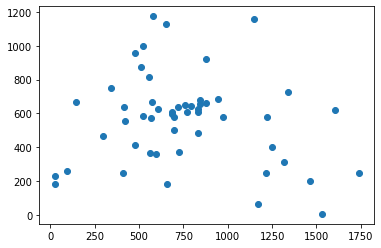

In [11]:
plt.scatter(x_list, y_list)
plt.show()

In [12]:
def distancia(a, b):
  a_array = np.array(a)
  b_array = np.array(b)
  return np.linalg.norm(a-b)

In [18]:
def dataToGraph(x, y, feromonio_inicial=10**(-6)):
  n = len(x)
  grafo_dist = []
  grafo_fero = []
  for i in range(n):
    dist = []
    fero = []
    for j in range(n):
      if i == j:
        dist.append(0)
        fero.append(0)
      else:
        dist.append(distancia(x[i], y[j]))
        fero.append(feromonio_inicial)
    grafo_dist.append(dist)
    grafo_fero.append(fero)
  return grafo_dist, grafo_fero

In [19]:
grafo_dist, grafo_fero = dataToGraph(x_list, y_list)

# ACO-TSP

In [20]:
def geraPopulacao_2(tamanho):
  formigas = []
  for i in range(tamanho):
    formigas.append([i])
  return formigas

In [23]:
def sum_pow(lista, pow):
  sum = 0
  for item in lista:
    sum += item**pow
  return sum

In [30]:
def buscaMenorCaminho_2(grafo_dist, grafo_fero, p, alfa, beta, Q, b, quant_pop, max_it):
  quant_cidades = len(grafo_dist)
  melhor_rota = []
  melhor_custo = np.inf
  t = 0
  while t < max_it:

    formigas = geraPopulacao_2(quant_pop)

    for formiga in formigas:
      historico = formiga.copy()

      while len(formiga) != quant_cidades:
        vizinhos_real, feromonios_real = getVerticesAdjacentes(grafo, formiga[-1])

        vizinhos, feromonios = [], []
        for vertice in range(len(vizinhos_real)):
          if vizinhos_real[vertice] not in historico:
            vizinhos.append(vizinhos_real[vertice])
            feromonios.append(feromonios_real[vertice])

        proba = []
        for vertice in range(len(vizinhos)):
          visibilidade = 1 / (grafo_dist[formiga[-1], vizinhos[vertice]])
          num = (getFeromonio(grafo, formiga[-1], vizinhos[vertice])**alfa) * (visibilidade**beta)
          deno = sum_pow(feromonios) * (visibilidade**beta)
          proba.append(num / deno)

        escolha = vizinhos[np.random.choice(np.arange(len(vizinhos)), p = proba)]

        formiga.append(escolha)
        historico.append(escolha)

    for formiga in formigas:
      if sum(formiga) < melhor_custo:
        melhor_custo = sum(formiga)
        melhor_rota = formiga
    
    evaporaFeromonios(grafo, p)

    for formiga in formigas:
      for vertice in range(len(formiga) - 1):
        feromonio_depositado = Q/(len(formiga) - 1)
        accFeromonio(grafo, formiga[vertice], formiga[vertice+1], feromonio_depositado)
    
    #formiga elitista
    for vertice in range(len(melhor_rota) - 1):
      feromonio_depositado = Q/(len(melhor_rota) - 1)
      accFeromonio(grafo, formiga[vertice], formiga[vertice+1], b*feromonio_depositado)

    print('\n--> Iteração:', t)
    for linha in grafo:
      print(linha)
    
    t += 1

In [ ]:
buscaMenorCaminho_2(grafo_dist=grafo_dist, grafo_fero=grafo_fero, p=0.5, alfa=1, beta=5, Q=100, b=5, quant_pop=len(grafo_dist), max_it=2)